<a href="https://colab.research.google.com/github/endangrusiana123/SLO/blob/main/MiniProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Load Dataset

In [2]:
import pandas as pd
#**************************************************************************
# Assuming the Excel files are named CPA1.xlsx, CPA2.xlsx, ..., CPA100.xlsx
num_files = 3
file_paths_CPA = [f"/content/drive/MyDrive/Colab Notebooks/SLO/Mini _Project_1/dataset/CPA{i}.xlsx" for i in range(1, num_files+1)]

# Load each Excel sheet into separate dataframes
CPA = [pd.read_excel(file) for file in file_paths_CPA]

merged_CPA = pd.concat(CPA, ignore_index=True)
shuffled_CPA = merged_CPA.sample(frac=1).reset_index(drop=True)

# Separate features and target
X_CPA = shuffled_CPA[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
Y_CPA = shuffled_CPA['kelas']
#**************************************************************************
# Assuming the Excel files are named CPB1.xlsx, CPB2.xlsx, ..., CPB100.xlsx
num_files = 7
file_paths_CPB = [f"/content/drive/MyDrive/Colab Notebooks/SLO/Mini _Project_1/dataset/CPB{i}.xlsx" for i in range(1, num_files+1)]

# Load each Excel sheet into separate dataframes
CPB = [pd.read_excel(file) for file in file_paths_CPB]

merged_CPB = pd.concat(CPB, ignore_index=True)
shuffled_CPB = merged_CPB.sample(frac=1).reset_index(drop=True)

X_CPB = shuffled_CPB[['powLv1', 'powLv2', 'powLv3', 'powLv4', 'powLv5']]
Y_CPB = shuffled_CPB['kelas']

# A. Skenario 75% training 25% testing

Input: Dataset CPA dan CPB <br>
Classsifier: SVM (default) dan KNN (default) <br>
Output: Sensitivity, Specificity, Accuracy, dan F1-Score <br>

For SVC: <br>
C: The default value is 1.0. This parameter is the regularization parameter. It controls the trade-off between achieving a low training error and a low testing error. <br>
kernel: The default kernel is 'rbf' (Radial Basis Function), as mentioned earlier. <br>
gamma: The default value is 'scale'. This parameter defines the kernel coefficient for 'rbf', 'poly', and 'sigmoid'. It's scale by default, which means it uses 1 / (n_features * X.var()) as the value of gamma.<br>
For KNeighborsClassifier:<br>
n_neighbors: The default value is 5. This parameter determines the number of neighbors to consider when making predictions.<br>
weights: The default value is 'uniform'. This parameter specifies the weight function used in prediction. It can be 'uniform' (all points in each neighborhood are weighted equally) or 'distance' (points are weighted by the inverse of their distance).<br>
algorithm: The default value is 'auto'. This parameter specifies the algorithm used to compute the nearest neighbors. It can be 'auto', 'ball_tree', 'kd_tree', or 'brute'. The algorithm is chosen automatically based on the training data.<br>


,data_sel,classifier_mode,sensitivity,specificity,accuracy,f1
0,CPA,SVM,0.400000,0.666667,0.400000,0.228571
1,CPA,KNN,0.640000,0.803350,0.640000,0.625665
2,CPB,SVM,0.480000,0.750000,0.480000,0.311351
3,CPB,KNN,0.697778,0.886231,0.697778,0.684824


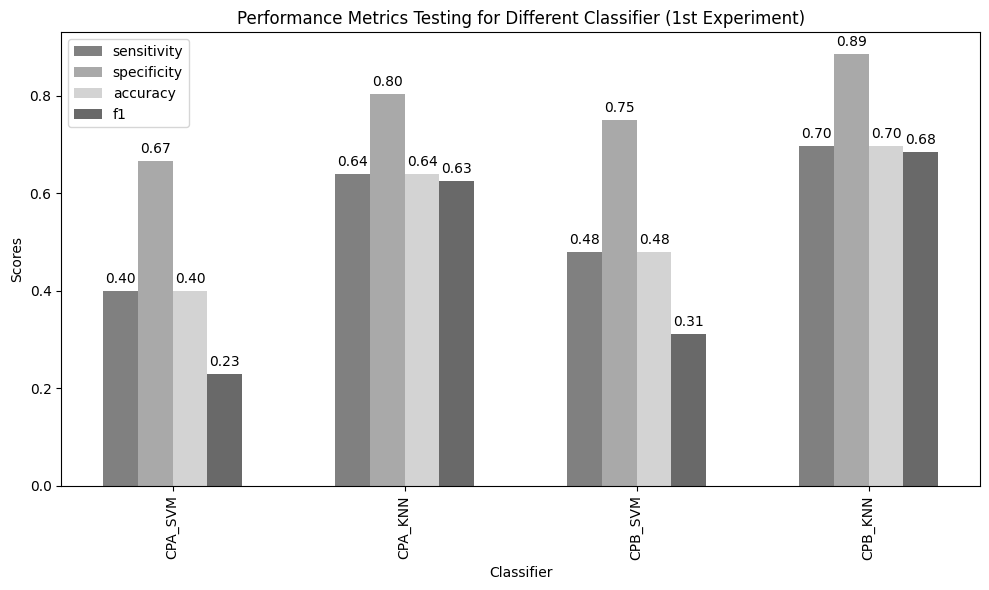

,data_sel,classifier_mode,sensitivity,specificity,accuracy,f1
3,CPB,KNN,0.697778,0.886231,0.697778,0.684824
1,CPA,KNN,0.640000,0.803350,0.640000,0.625665
2,CPB,SVM,0.480000,0.750000,0.480000,0.311351
0,CPA,SVM,0.400000,0.666667,0.400000,0.228571


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from IPython.display import display

def skenario_75tr25ts(input_X_CPA, input_Y_CPA, input_X_CPB, input_Y_CPB, data_sel_list, classifier_mode_list):
  results = []
  for data_sel in data_sel_list:
    if data_sel == 'CPA':
      X = input_X_CPA
      Y = input_Y_CPA
    elif data_sel == 'CPB':
      X = input_X_CPB
      Y = input_Y_CPB
    for classifier_mode in classifier_mode_list:
      X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
      if classifier_mode == 'SVM':
        svm_classifier = SVC()
        svm_classifier.fit(X_train, Y_train)
        Y_pred = svm_classifier.predict(X_test)
      elif classifier_mode == 'KNN':
        knn_classifier = KNeighborsClassifier()
        knn_classifier.fit(X_train, Y_train)
        Y_pred = knn_classifier.predict(X_test)\

      accuracy = accuracy_score(Y_test, Y_pred)
      recall = recall_score(Y_test, Y_pred, average='weighted')
      f1 = f1_score(Y_test, Y_pred, average='weighted')
      conf_matrix = confusion_matrix(Y_test, Y_pred)
      TP = conf_matrix.diagonal()
      FP = conf_matrix.sum(axis=0) - TP
      FN = conf_matrix.sum(axis=1) - TP
      TN = conf_matrix.sum() - (TP + FP + FN)
      sensitivity = TP / (TP + FN)
      specificity = TN / (TN + FP)

      results.append({
          'data_sel': data_sel,
          'classifier_mode': classifier_mode,
          'sensitivity': recall,
          'specificity': specificity.mean(),
          'accuracy': accuracy,
          'f1': f1
      })
  return pd.DataFrame(results)

data_sel_list = ['CPA', 'CPB']
classifier_mode_list = ['SVM', 'KNN']
results_df = skenario_75tr25ts(X_CPA, Y_CPA, X_CPB, Y_CPB, data_sel_list, classifier_mode_list)
display(results_df)

plt.figure(figsize=(10, 6))

bar_width = 0.15
index = np.arange(len(results_df))

metrics = ['sensitivity', 'specificity', 'accuracy', 'f1']
# Using grayscale colors
colors = ['gray', 'darkgray', 'lightgray', 'dimgray']

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, results_df[metric],
            bar_width, color=colors[i], label=metric)
    # Displaying values on top of bars
    for j, value in enumerate(results_df[metric]):
        plt.text(index[j] + i * bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Performance Metrics Testing for Different Classifier (1st Experiment)')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, results_df.apply(lambda x: f"{x['data_sel']}_{x['classifier_mode']}", axis=1), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

sorted_result_df = results_df.sort_values(by='accuracy', ascending=False)
sorted_result_df


# B. Skenario Training+Validation(k-fold CV) (75%), dan 25% Testing

Input: Dataset CPA dan CPB <br>
Classsifier: SVM (default) dan KNN (default) <br>
Validation: k-fold CV -> iteration: find best kernel (SVM) & n-neighbors (KNN) by accuracy<br>
Test Output: Sensitivity, Specificity, Accuracy, dan F1-Score <br>

,data_sel,classifier_mode,kernel_mode,accuracy
0,CPA,SVM,linear,0.438135
1,CPA,SVM,poly,0.512264
2,CPA,SVM,rbf,0.438135
3,CPA,SVM,sigmoid,0.438135
4,CPA,KNN,1,0.733418
5,CPA,KNN,7,0.663208
6,CPA,KNN,13,0.636611
7,CPA,KNN,19,0.640276
8,CPA,KNN,25,0.619303
9,CPB,SVM,linear,0.432593


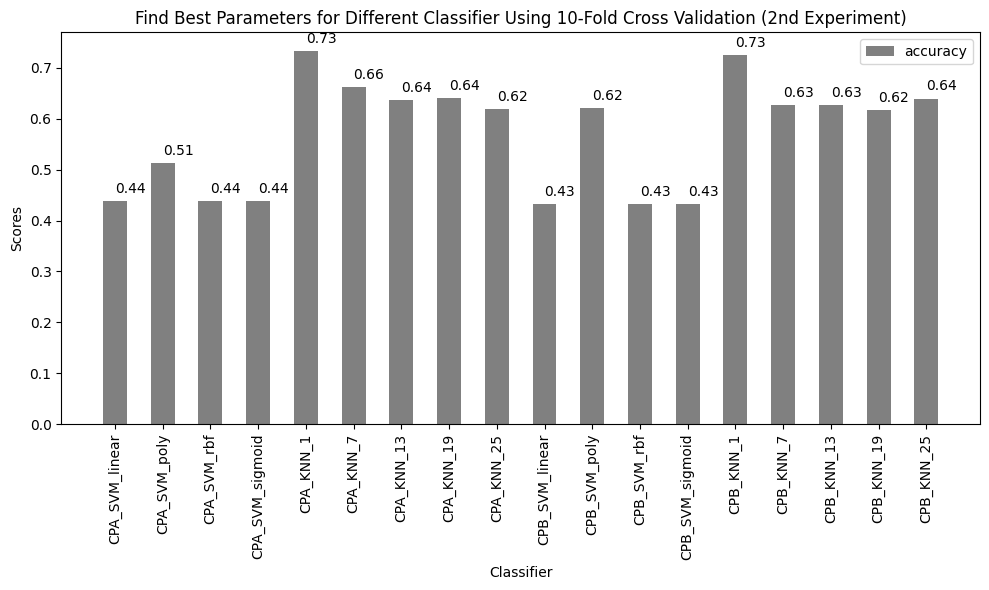

Settings for best accuracy for each data_sel:
   data_sel classifier_mode kernel_mode  accuracy
4       CPA             KNN           1  0.733418
13      CPB             KNN           1  0.725926


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from IPython.display import display

# Define your data (X_CPA, Y_CPA, X_CPB, Y_CPB) here
# 25% testing
X_CPA_trainNval, X_CPA_test, Y_CPA_trainNval, Y_CPA_test = train_test_split(X_CPA, Y_CPA, test_size=0.25, random_state=42)
X_CPB_trainNval, X_CPB_test, Y_CPB_trainNval, Y_CPB_test = train_test_split(X_CPB, Y_CPB, test_size=0.25, random_state=42)

def get_best_accuracy(data_sel_list, classifier_mode_list, svm_kernel_modes, knn_kernel_modes, fold_num):
    results = []
    for data_sel in data_sel_list:
        if data_sel == 'CPA':
            X = X_CPA_trainNval
            Y = Y_CPA_trainNval
        elif data_sel == 'CPB':
            X = X_CPB_trainNval
            Y = Y_CPB_trainNval

        for classifier_mode in classifier_mode_list:
            for kernel_mode in svm_kernel_modes if classifier_mode == 'SVM' else knn_kernel_modes:

                if classifier_mode == 'SVM':
                    svm_classifier = SVC(kernel=kernel_mode)
                    accuracy = cross_val_score(svm_classifier, X, Y, cv = fold_num)
                elif classifier_mode == 'KNN':
                    knn_classifier = KNeighborsClassifier(n_neighbors=kernel_mode)
                    accuracy = cross_val_score(knn_classifier, X, Y, cv = fold_num)

                accuracy_mean = accuracy.mean()

                results.append({
                    'data_sel': data_sel,
                    'classifier_mode': classifier_mode,
                    'kernel_mode': kernel_mode,
                    'accuracy': accuracy_mean
                })

    return pd.DataFrame(results)

# Assuming you have X_CPA, Y_CPA, X_CPB, Y_CPB defined previously

data_sel_list = ['CPA', 'CPB']
classifier_mode_list = ['SVM', 'KNN']
svm_kernel_modes = ['linear', 'poly', 'rbf', 'sigmoid']
knn_kernel_modes = list(range(1, 26, 6))
fold_num = 10 #4 fold: 75% training 25% validation

results_df = get_best_accuracy(data_sel_list, classifier_mode_list, svm_kernel_modes, knn_kernel_modes, fold_num)
display(results_df)

plt.figure(figsize=(10, 6))

bar_width = 0.5
index = np.arange(len(results_df))

metrics = ['accuracy']
# Using grayscale colors
colors = ['gray', 'darkgray', 'lightgray', 'dimgray']

for i, metric in enumerate(metrics):
    bars = plt.bar(index + i * bar_width, results_df[metric],
                   bar_width, color=colors[i], label=metric)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), va='bottom')

plt.xlabel('Classifier')
plt.ylabel('Scores')
plt.title('Find Best Parameters for Different Classifier Using 10-Fold Cross Validation (2nd Experiment)')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, results_df.apply(lambda x: f"{x['data_sel']}_{x['classifier_mode']}_{x['kernel_mode']}", axis=1), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

best_accuracy_settings = results_df.loc[results_df.groupby('data_sel')['accuracy'].idxmax()]
print("Settings for best accuracy for each data_sel:")
print(best_accuracy_settings)

# 25% Testing

,data_sel,classifier_mode,sensitivity,specificity,accuracy,f1
0,CPA,SVM,0.491429,0.709606,0.491429,0.439821
1,CPA,KNN,0.708571,0.851841,0.708571,0.700276
2,CPB,SVM,0.642222,0.857607,0.642222,0.555233
3,CPB,KNN,0.708889,0.896612,0.708889,0.710218


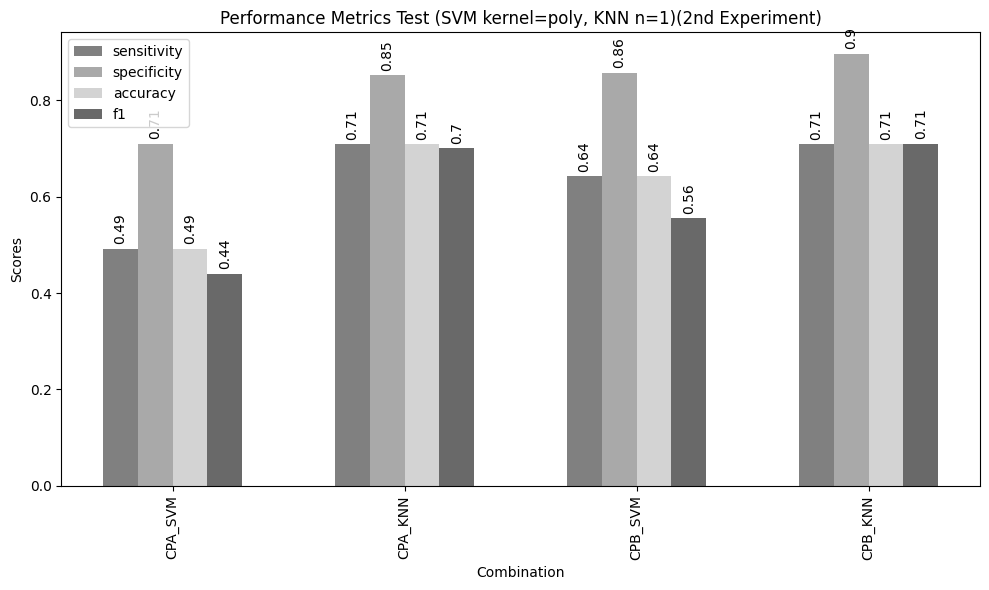

In [62]:
def skenario_knn_25ts(data_sel_list, classifier_mode_list):
  results = []
  for data_sel in data_sel_list:
    if data_sel == 'CPA':
      X_trainNval =  X_CPA_trainNval
      Y_trainNval =  Y_CPA_trainNval
      X_test = X_CPA_test
      Y_test = Y_CPA_test
    elif data_sel == 'CPB':
      X_trainNval =  X_CPB_trainNval
      Y_trainNval =  Y_CPB_trainNval
      X_test = X_CPB_test
      Y_test = Y_CPB_test
    for classifier_mode in classifier_mode_list:
      if classifier_mode == 'SVM':
        svm_classifier = SVC(kernel='poly')
        svm_classifier.fit(X_trainNval, Y_trainNval)
        Y_pred = svm_classifier.predict(X_test)
      elif classifier_mode == 'KNN':
        knn_classifier = KNeighborsClassifier(n_neighbors=1)
        knn_classifier.fit(X_trainNval, Y_trainNval)
        Y_pred = knn_classifier.predict(X_test)

      accuracy = accuracy_score(Y_test, Y_pred)
      recall = recall_score(Y_test, Y_pred, average='weighted')
      f1 = f1_score(Y_test, Y_pred, average='weighted')
      conf_matrix = confusion_matrix(Y_test, Y_pred)
      TP = conf_matrix.diagonal()
      FP = conf_matrix.sum(axis=0) - TP
      FN = conf_matrix.sum(axis=1) - TP
      TN = conf_matrix.sum() - (TP + FP + FN)
      sensitivity = TP / (TP + FN)
      specificity = TN / (TN + FP)

      results.append({
          'data_sel': data_sel,
          'classifier_mode': classifier_mode,
          'sensitivity': recall,
          'specificity': specificity.mean(),
          'accuracy': accuracy,
          'f1': f1
      })
  return pd.DataFrame(results)

data_sel_list = ['CPA', 'CPB']
classifier_mode_list = ['SVM', 'KNN']
results_df = skenario_knn_25ts(data_sel_list, classifier_mode_list)
display(results_df)

plt.figure(figsize=(10, 6))

bar_width = 0.15
index = np.arange(len(results_df))

metrics = ['sensitivity', 'specificity', 'accuracy', 'f1']
# Using grayscale colors
colors = ['gray', 'darkgray', 'lightgray', 'dimgray']

for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, results_df[metric],
            bar_width, color=colors[i], label=metric)
    for j, v in enumerate(results_df[metric]):
        plt.text(index[j] + i * bar_width, v + 0.01, str(round(v, 2)), ha='center', va='bottom', rotation=90)

plt.xlabel('Combination')
plt.ylabel('Scores')
plt.title('Performance Metrics Test (SVM kernel=poly, KNN n=1)(2nd Experiment)')
plt.xticks(index + bar_width * (len(metrics) - 1) / 2, results_df.apply(lambda x: f"{x['data_sel']}_{x['classifier_mode']}", axis=1), rotation=90)
plt.legend()
plt.tight_layout()
plt.show()